##  Import Packages

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import shutil
import numpy as np
import os

In [2]:
# pip freeze

In [1]:
from tensorflow.keras import utils

In [2]:
from tensorflow.keras import models

In [3]:
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
from tensorflow.keras import utils, layers, models
from tensorflow.keras.callbacks import EarlyStopping

ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (/Users/lingchin/.pyenv/versions/3.8.13/envs/lemon_project/lib/python3.8/site-packages/tensorflow/_api/v2/compat/v2/experimental/__init__.py)

## Explore Data

In [4]:
data = json.load(open("../raw_data/annotations/instances_default.json"))

In [5]:
# data

In [6]:
data.keys()

dict_keys(['licenses', 'info', 'annotations', 'images', 'categories'])

In [7]:
# data['info']

In [8]:
# data['images'][:2]

In [9]:
# data['images'][-3:-1]

In [10]:
# for image in data['images']:
#     if image['id']==3400 or image['id']==2166:
#         print('file name', image['file_name'])

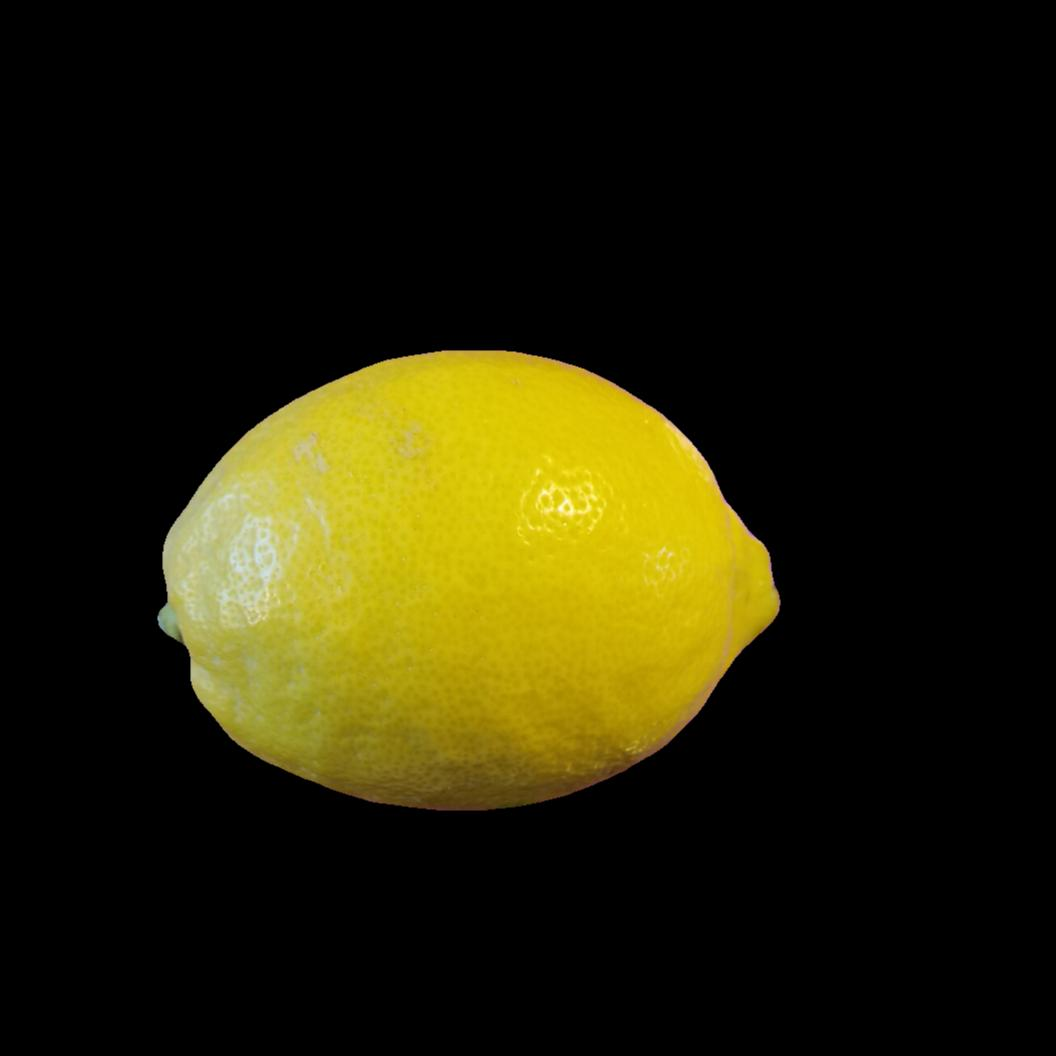

In [48]:
from IPython.display import Image, display

Image1 = '../raw_data/images/0001_A_H_0_A.jpg'
display(Image(Image1))

SyntaxError: invalid decimal literal (626174350.py, line 1)

In [51]:
test_img1 = image.imread(Image1)

test_img1.shape
# plt.imshow((Image1))

(1056, 1056, 3)

In [13]:
dict_keys=['licenses', 'info', 'annotations', 'images', 'categories']

In [14]:
type(data['annotations'])

list

In [15]:
len(data['annotations'])

33753

In [16]:
len(data['images'])

2690

In [17]:
# data['annotations'][10:12]

In [18]:
# data['annotations'][0]['category_id']

In [19]:
annotations = data['annotations']

In [20]:
for dicts in annotations:
#     print('id',dicts['id'],'image_id', dicts['image_id'],'category',dicts['category_id'])
    
    if dicts['category_id'] == 8:
        print('healthy',dicts['image_id'])

healthy 2166
healthy 3400


## Merge Category with image #
Found multiple categories PER image
Only 2 images had category =8 meaning 'healthy' and those are image_id 2166 & 3400 but these images have other categories as well

In [21]:
data['categories']

[{'id': 1, 'supercategory': '', 'name': 'image_quality'},
 {'id': 2, 'supercategory': '', 'name': 'illness'},
 {'id': 3, 'supercategory': '', 'name': 'gangrene'},
 {'id': 4, 'supercategory': '', 'name': 'mould'},
 {'id': 5, 'supercategory': '', 'name': 'blemish'},
 {'id': 6, 'supercategory': '', 'name': 'dark_style_remains'},
 {'id': 7, 'supercategory': '', 'name': 'artifact'},
 {'id': 8, 'supercategory': '', 'name': 'condition'},
 {'id': 9, 'supercategory': '', 'name': 'pedicel'}]

In [22]:
rows = [[dicts['id'],dicts['area'], dicts['image_id'],dicts['category_id']] for dicts in annotations]

In [23]:
df = pd.DataFrame(rows, columns=["Annot_id","area","image_id","category"])
df

,Annot_id,area,image_id,category
0,1,539.0,0,9
1,2,622.0,0,5
2,3,809.0,0,5
3,4,30.0,100,5
4,5,31.0,100,2
...,...,...,...,...
33748,33749,1517.0,6502,5
33749,33750,75.0,6502,5
33750,33751,760.0,6502,5
33751,33752,84.0,6502,5


<AxesSubplot:>

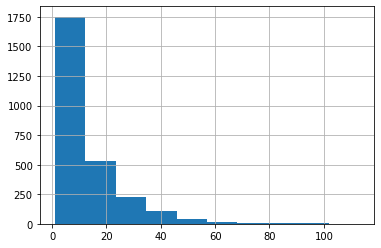

In [24]:
df.groupby(['image_id']).size().hist()

In [25]:
category_ = df.groupby('image_id').apply(lambda group: group['category'].unique())

In [26]:
category_.map(sorted)
    

image_id
0          [5, 9]
100     [2, 5, 7]
101     [2, 5, 9]
102     [2, 5, 7]
103        [5, 9]
          ...    
6098          [4]
6099          [4]
6500    [2, 5, 7]
6501       [4, 5]
6502       [4, 5]
Length: 2690, dtype: object

In [27]:
# len(df['image_id'].unique())

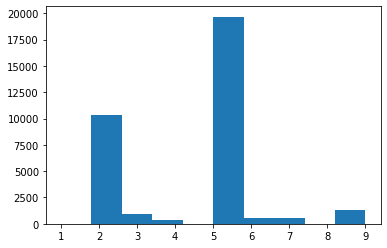

In [28]:
plt.hist(df['category']);

In [29]:
# len(data['licenses'])

In [30]:
# len(data['info'])

In [31]:
# df[df['image_id']==100]

In [32]:
images = data['images']
images

[{'id': 0,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0001_A_H_0_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 100,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_150_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 101,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_15_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 102,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_165_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 103,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_30_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 1056},
 {'id': 104,
  'date_captured': 0,
  'coco_url': '',
  'file_name': 'images/0003_A_V_45_A.jpg',
  'license': 0,
  'flickr_url': '',
  'height': 1056,
  'width': 

In [33]:
image_rows = [[image['id'],image['file_name']] for image in images]

In [34]:
image_df = pd.DataFrame(image_rows, columns = ['image_id','file_name'])
image_df

,image_id,file_name
0,0,images/0001_A_H_0_A.jpg
1,100,images/0003_A_V_150_A.jpg
2,101,images/0003_A_V_15_A.jpg
3,102,images/0003_A_V_165_A.jpg
4,103,images/0003_A_V_30_A.jpg
...,...,...
2685,6098,images/0023_G_H_135_F.jpg
2686,6099,images/0023_G_H_150_F.jpg
2687,6500,images/0037_G_I_0_A.jpg
2688,6501,images/0037_G_I_105_A.jpg


In [35]:
merged_df = df.merge(image_df)
merged_df

,Annot_id,area,image_id,category,file_name
0,1,539.0,0,9,images/0001_A_H_0_A.jpg
1,2,622.0,0,5,images/0001_A_H_0_A.jpg
2,3,809.0,0,5,images/0001_A_H_0_A.jpg
3,4,30.0,100,5,images/0003_A_V_150_A.jpg
4,5,31.0,100,2,images/0003_A_V_150_A.jpg
...,...,...,...,...,...
33748,33749,1517.0,6502,5,images/0037_G_I_120_A.jpg
33749,33750,75.0,6502,5,images/0037_G_I_120_A.jpg
33750,33751,760.0,6502,5,images/0037_G_I_120_A.jpg
33751,33752,84.0,6502,5,images/0037_G_I_120_A.jpg


In [36]:
merged_df[merged_df['file_name']=="images/0002_G_I_45_A.jpg"]

,Annot_id,area,image_id,category,file_name
32040,32041,15.0,5499,2,images/0002_G_I_45_A.jpg
32041,32042,68707.0,5499,4,images/0002_G_I_45_A.jpg


In [37]:
merged_df[merged_df['file_name']=="images/0002_G_I_45_A.jpg"].groupby('category').sum('area')

,Annot_id,area,image_id
category,,,
2,32041,15.0,5499
4,32042,68707.0,5499


In [38]:
merged_df[merged_df['file_name']=="images/0001_E_H_0_C.jpg"]

,Annot_id,area,image_id,category,file_name
23781,23782,20.0,3407,2,images/0001_E_H_0_C.jpg
23782,23783,7.0,3407,2,images/0001_E_H_0_C.jpg
23783,23784,27.0,3407,5,images/0001_E_H_0_C.jpg
23784,23785,40.0,3407,2,images/0001_E_H_0_C.jpg
23785,23786,520.0,3407,2,images/0001_E_H_0_C.jpg
23786,23787,37.0,3407,2,images/0001_E_H_0_C.jpg
23787,23788,17.0,3407,2,images/0001_E_H_0_C.jpg
23788,23789,18.0,3407,2,images/0001_E_H_0_C.jpg
23789,23790,117.0,3407,5,images/0001_E_H_0_C.jpg
23790,23791,67.0,3407,2,images/0001_E_H_0_C.jpg


In [39]:
merged_df[merged_df['file_name']=="images/0001_E_H_0_C.jpg"].groupby('category').sum('area')

,Annot_id,area,image_id
category,,,
2,356868,826.0,51105
5,118971,706.0,17035
9,23793,145.0,3407


In [40]:
files=merged_df['file_name'].unique().tolist()
len(files)

2690

In [41]:
files

['images/0001_A_H_0_A.jpg',
 'images/0003_A_V_150_A.jpg',
 'images/0003_A_V_15_A.jpg',
 'images/0003_A_V_165_A.jpg',
 'images/0003_A_V_30_A.jpg',
 'images/0003_A_V_45_A.jpg',
 'images/0003_A_V_60_A.jpg',
 'images/0003_A_V_75_A.jpg',
 'images/0003_A_V_90_A.jpg',
 'images/0004_A_H_0_A.jpg',
 'images/0004_A_H_105_A.jpg',
 'images/0004_A_H_120_A.jpg',
 'images/0004_A_H_135_A.jpg',
 'images/0004_A_H_150_A.jpg',
 'images/0004_A_H_15_A.jpg',
 'images/0004_A_H_165_A.jpg',
 'images/0004_A_H_30_A.jpg',
 'images/0004_A_H_45_A.jpg',
 'images/0004_A_H_60_A.jpg',
 'images/0004_A_H_75_A.jpg',
 'images/0004_A_H_90_A.jpg',
 'images/0004_A_I_0_A.jpg',
 'images/0004_A_I_105_A.jpg',
 'images/0004_A_I_120_A.jpg',
 'images/0004_A_I_135_A.jpg',
 'images/0004_A_I_150_A.jpg',
 'images/0004_A_I_15_A.jpg',
 'images/0004_A_I_165_A.jpg',
 'images/0004_A_I_30_A.jpg',
 'images/0004_A_I_45_A.jpg',
 'images/0004_A_I_60_A.jpg',
 'images/0004_A_I_75_A.jpg',
 'images/0004_A_I_90_A.jpg',
 'images/0004_A_V_0_A.jpg',
 'imag

## Split the images into Train and Test sets

In [42]:
import random
random.seed(2)
random.shuffle(files)

train_img = files[:int(len(files)*.70)+1] 

test_img= files[int(len(files)*.70)+1:] 

In [43]:
list1=list(range(1,2691,1))
list1[:2],list1[-3:]

([1, 2], [2688, 2689, 2690])

In [44]:
train=int(len(list1)*0.7)

In [45]:
train_list = list1[:train+1]
train_list[-1]

1883

In [46]:
len(train_list)

1883

In [47]:
test_list = list1[train+1:]
test_list[-1], test_list[:2]

(2690, [1884, 1885])

In [48]:
len(test_list)

807

## Create Function to classify unhealthy and healthy lemon images

In [49]:
def classify_category(merged_df,file_name):
    targeted=merged_df.loc[merged_df['file_name'] == file_name].groupby('category').sum('area')
    result=[]
    for idx in targeted.index:
        if idx in [2,3,4]:
            result.append(True)
        else:
            result.append(False)
    if any(result):
        return("Unhealthy_lemon")
    else:
        return("Healthy_lemon")

In [50]:
####blank out once folders created####

# for file in train_img:
#         shutil.copy2(f"../raw_data/{file}",f"../raw_data/classified_images/Train_lemon/{classify_category(merged_df,file)}/{file.split('/')[-1]}")

In [51]:
####blank out once folders created####
# for file in test_img:
#     shutil.copy2(f"../raw_data/{file}",f"../raw_data/classified_images/Test_lemon/{classify_category(merged_df,file)}/{file.split('/')[-1]}")

In [52]:
####This is for when you only need Health vs Unhealthy folders ####
# for file in files:
#     shutil.copy2(f"../raw_data/{file}",
#                  f"../raw_data/classified_images/{classify_category(merged_df,file)}/{file.split('/')[-1]}") 
#####use below cells to create 2 folders(via terminal) with Train and Test and then Healthy and unhealthy

In [55]:
trh = len(os.listdir("../raw_data/classified_images/Train_lemon/Healthy_lemon"))

In [56]:
truh = len(os.listdir("../raw_data/classified_images/Train_lemon/Unhealthy_lemon"))

In [57]:
tsh = len(os.listdir("../raw_data/classified_images/Test_lemon/Healthy_lemon"))

In [58]:
tsuh = len(os.listdir("../raw_data/classified_images/Test_lemon/Unhealthy_lemon"))

In [60]:
trh+truh+tsh+tsuh

2691

## Make a baseline model

In [ ]:
#Use this method to quickly read a small number of images
# filepath = os.listdir("..raw_data/classified_images/Train_lemon/Healthy_lemon") # a folder of some images
# filepath

In [ ]:
# lemon_data = []
# for file in filepath:
#     lemon_data.append(image.imread(f'..raw_data/classified_images/Train_lemon/Healthy_lemon/{file}'))

In [62]:
# lemon_data = utils.image_dataset_from_directory('..raw_data/classified_images/Train_lemon')
#this should give you a list of how many files per category eg healthy or unhealthy

SyntaxError: invalid syntax (2607055022.py, line 1)

In [6]:
train_data = utils.image_dataset_from_directory('../raw_data/classified_images/Train_lemon', seed = 1,validation_split = 0.3, subset = 'training')

Found 1883 files belonging to 2 classes.
Using 1319 files for training.


2022-08-13 14:44:06.276841: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
validation_data = utils.image_dataset_from_directory('../raw_data/classified_images/Train_lemon', seed =1, validation_split = 0.2, subset = 'validation')

Found 1883 files belonging to 2 classes.
Using 376 files for validation.


In [33]:
def initialize_model():

    model = models.Sequential()
    
    ### Resizing layer before Model
    model.add(layers.Resizing(128,128))#,input_shape=(256, 256, 3) you only need input_shape if you want model.summary()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (28,28), activation='relu', padding='same', input_shape=(128,128, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ## Extra Layers just for fun ##
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))
    
    ### Last layer - Classification Layer with 1 output corresponding to healthy vs unhealthy
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy',  #'sparse_categorical_crossentropy'
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [37]:
model = initialize_model()
# model.summary()

In [38]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

histroy = model.fit(train_data, 
          batch_size=8, 
          epochs=5,
          validation_data = validation_data,
            callbacks=[es])

Epoch 1/5
42/42 [==============================] - 161s 4s/step - loss: 2.2942 - accuracy: 0.6892 - val_loss: 0.5878 - val_accuracy: 0.7394
Epoch 2/5
42/42 [==============================] - 161s 4s/step - loss: 0.5854 - accuracy: 0.7111 - val_loss: 0.5638 - val_accuracy: 0.7420
Epoch 3/5
42/42 [==============================] - 161s 4s/step - loss: 0.5578 - accuracy: 0.7149 - val_loss: 0.5552 - val_accuracy: 0.7420
Epoch 4/5
42/42 [==============================] - 160s 4s/step - loss: 0.5435 - accuracy: 0.7218 - val_loss: 0.5523 - val_accuracy: 0.7394
Epoch 5/5
42/42 [==============================] - 160s 4s/step - loss: 0.5348 - accuracy: 0.7309 - val_loss: 0.5604 - val_accuracy: 0.7287


In [39]:
print(model.evaluate(train_data, verbose=0))

[0.5151278376579285, 0.7604245543479919]


In [40]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

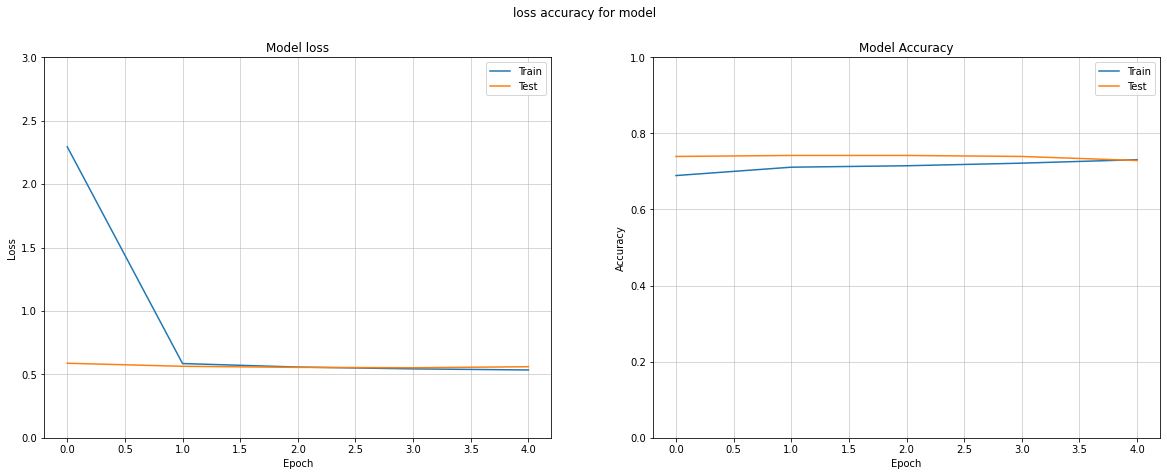

In [41]:
plot_loss_accuracy(histroy, title="loss accuracy for model")

In [21]:
weights = model.get_weights()
model_kernel = weights[0][0][0]

In [22]:
model_kernel

array([[-0.01269708,  0.01152883, -0.00425735, -0.01065214, -0.0255094 ,
        -0.00238092,  0.02172249,  0.00296013],
       [-0.0211852 , -0.00346935, -0.00563144,  0.00783518, -0.01672809,
         0.00623908,  0.01540987,  0.02150156],
       [ 0.02657808, -0.02370065,  0.02321129,  0.01812096, -0.0264842 ,
        -0.02047445, -0.02209685,  0.0199805 ]], dtype=float32)

In [43]:
models.save_model(model,'basic_model_02')

INFO:tensorflow:Assets written to: basic_model_02/assets


In [27]:
test_data = utils.image_dataset_from_directory('../raw_data/classified_images/Test_lemon', seed =1)

Found 807 files belonging to 2 classes.


In [28]:
model.predict(test_data)

array([[0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],
       [0.5852906],


In [ ]:
# pip install h5py

In [44]:
pred_model = models.load_model('../models/basic_model_02')
print("model loaded")

model loaded


In [9]:
def health_rating(health_rating):
    if health_rating <0.3:
        health = "Fairly healthy"
    elif health_rating >=0.3 and health_rating <= 0.6:
        health = "Not very healthy"
    else:
        health= "Unhealthy!"
    return health

print(health_rating(0.6))

Not very healthy


In [11]:
response = {'detail':1}
response.keys()

dict_keys(['detail'])

In [ ]:
# from pycocotools.coco import COCO
# coco = COCO("../raw_data/annotations/instances_default.json")

In [ ]:
# coco.anns

In [ ]:
# coco.dataset